<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plot
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [ ]:
data.info()
data_test.info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [ ]:
#напишем функцию, для того чтобы посмотреть одинаковые параметры в трех таблицах
def description (data):
    print(f"Размер:    {data.shape}")
    print("Пропуски: ", data.isna().sum().sum())
    print("Дубликаты: ", data.duplicated().sum())
  

In [ ]:
description(data)

Размер:    (19439, 87)
Пропуски:  4481
Дубликаты:  0


In [ ]:
description(data_test)

Размер:    (5290, 53)
Пропуски:  90
Дубликаты:  0


In [ ]:
description(data_train)

Размер:    (14149, 87)
Пропуски:  4100
Дубликаты:  0


In [ ]:
data.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [ ]:
#удаляем пропуски
#data_test.dropna(inplace=True)
#data_train.dropna(inplace=True)
#data.dropna(inplace=True)

In [ ]:
#удаляем пропуски
data_test = data_test.fillna(method='ffill')
data_train = data_train.fillna(method='ffill')
data = data.fillna(method='ffill')

In [ ]:
data_train.isna().sum().sum()

0

ВЫВОД: Мы видим, что данные в тестовой таблице, содержат меньше столбцов чем в обучающей и исходной таблице.  Мы удалили все пропуски в трех таблицах, чтобы дальше оперировать данными

Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

Расчёт эффективности

Эффективность обогащения рассчитывается по формуле 
recovery = (c*(f-t))/(f*(c-t)) * 100

C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

In [ ]:
#c = rougher.output.concentrate_au
#f = rougher.input.feed_au
#t = rougher.output.tail_au
#recovery = (c*(f-t))/(f*(c-t)) * 100

In [ ]:
data_train['rougher.output.recovery'].median()

85.2994620986978

In [ ]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = (c*(f-t))/(f*(c-t)) * 100
recovery.median()

85.29946209869779

In [ ]:
pred = recovery
true = data_train['rougher.output.recovery']
mean_absolute_error(true, pred)

9.73512347450521e-15

ВЫВОД: Значение MAE равно 9.73, что очень мало, и это значит, что эффективность обогащения рассчитана правильно

<div class="alert alert-info">$Recovery = \frac{C*(F - T)}{F*(C - T)}*100\%$ </div> 

Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [ ]:
col = set(data.columns) - set(data_test.columns)
len(col)
col

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [ ]:
col2 = set(data_train.columns) - set(data_test.columns)
len(col2)
col2

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Мы видим, что в data_test отсутствует 34 столбца, которые есть в data и data_train. Эти столбцы содержат следующие данные: финальная концентрация металла, степень эффективости обогащения металлов финальная, "отвальные хвосты" после всех очисток (финальные), концентрация после первичной очистки, хвосты после первичной очистки, рассчетные характеристики, концетрация металлов после флотакции, хвосты после флотации, хвосты после вторичной очистки. 

Из всех данных только 4 рассчетные. В основном отсутвуют "хвосты", и нет признаков, которые можно использовать как target, а именно recovery

## Анализ данных

Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [ ]:
def visio (df, col1, col2, col3):
  plt.figure(figsize=[12,9])
  plt.hist(data[col1], bins=100, label = 'Золото', alpha=.5)
  plt.hist(data[col2], bins=100, label = 'Серебро', alpha=.5)
  plt.hist(data[col3], bins=100, label = 'Свинец', alpha=.5)

  plt.xlim([0, 60])
  plt.ylim([0, 1500])

  plt.legend(loc='upper left', fontsize='x-large')

  plt.title("Гистограмма распределения концентрации")
  plt.show()

In [ ]:
au_r = round(data['rougher.output.concentrate_au'].mean(),2)
ag_r = round(data['rougher.output.concentrate_ag'].mean(),2)
pb_r = round(data['rougher.output.concentrate_pb'].mean(),2)
print("Черновая концентрация после флотации")
print(f"Концентрация Серебра:{ag_r},Свинца:{pb_r},Золота:{au_r}")



Черновая концентрация после флотации
Концентрация Серебра:11.99,Свинца:7.61,Золота:19.77


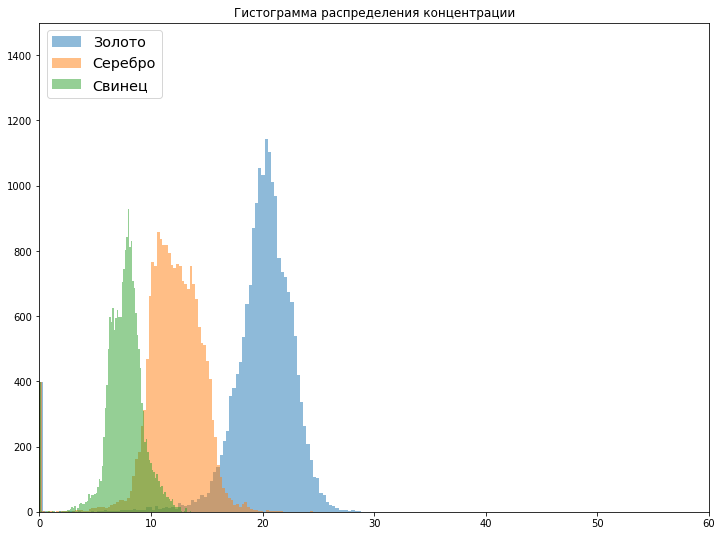

In [ ]:
visio (data, 'rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb')

In [ ]:
au_p = round(data['primary_cleaner.output.concentrate_au'].mean(),2)
ag_p = round(data['primary_cleaner.output.concentrate_ag'].mean(),2)
pb_p = round(data['primary_cleaner.output.concentrate_pb'].mean(),2)
print("Концентрация после первичной очистки")
print(f"Концентрация Серебра:{ag_p},Свинца:{pb_p},Золота:{au_p}")



Концентрация после первичной очистки
Концентрация Серебра:8.44,Свинца:9.81,Золота:32.12


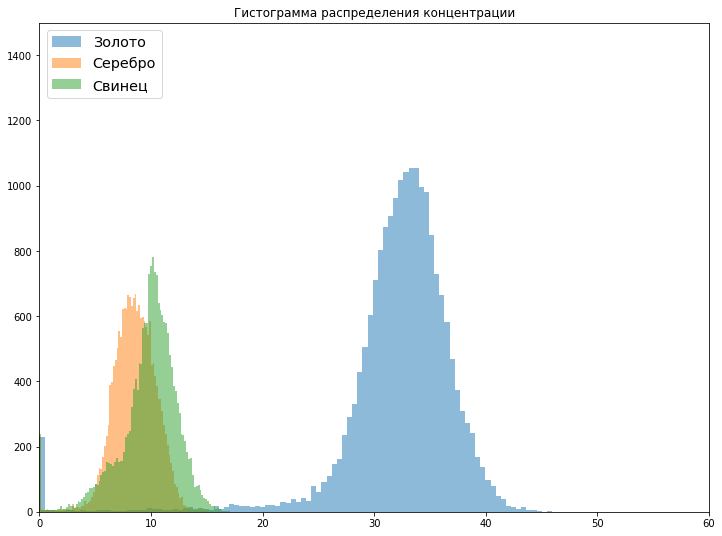

In [ ]:
visio (data, 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb')

In [ ]:
au_f = round(data['final.output.concentrate_au'].mean(),2)
ag_f = round(data['final.output.concentrate_ag'].mean(),2)
pb_f = round(data['final.output.concentrate_pb'].mean(),2)
print("Финальная концентрация")
print(f"Концентрация Серебра:{ag_f},Свинца:{pb_f},Золота:{au_f}")



Финальная концентрация
Концентрация Серебра:5.17,Свинца:9.98,Золота:44.08


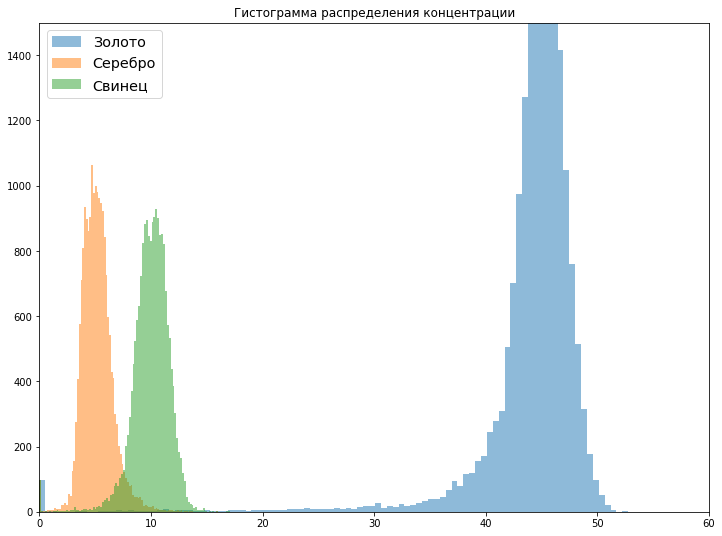

In [ ]:
visio(data, 'final.output.concentrate_au', 'final.output.concentrate_ag','final.output.concentrate_pb')

ВЫВОД: концентрация золота увеличивается, значит первичная и вторичная очистки работают эффективно. Концентрация золота увеличилась более чем в два раза, по сравнению с количеством, которое мы получили после флотации

<div class="alert alert-info">по гистаграммам мы видим, что голубой холм - "золото" сместился и увеличился, относительно других металлов, это подтверждает наши выводы о том, что очистка золота идет эффективно</div> 

Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [ ]:
data_train["rougher.input.feed_size"].value_counts()

55.190726     72
48.594625     37
124.582328    21
72.919884      6
51.811890      4
              ..
46.695350      1
46.920467      1
46.839927      1
46.675392      1
94.544358      1
Name: rougher.input.feed_size, Length: 13997, dtype: int64

In [ ]:
data_test["rougher.input.feed_size"].value_counts()

64.714413    2
62.710452    1
56.204494    1
55.413701    1
55.973239    1
            ..
44.899337    1
44.423092    1
44.607046    1
44.647361    1
77.678700    1
Name: rougher.input.feed_size, Length: 5289, dtype: int64

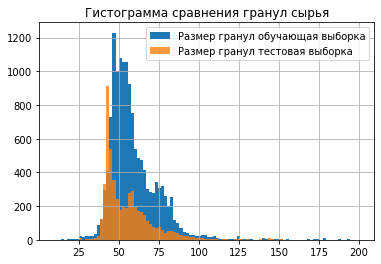

In [ ]:
data_train["rougher.input.feed_size"].hist(bins=100, range=(10,200), grid=True, label="Размер гранул обучающая выборка")
data_test["rougher.input.feed_size"].hist(bins=100, range=(10,200), alpha=0.8, label="Размер гранул тестовая выборка")
plt.legend(prop={'size': 10})

plt.title("Гистограмма сравнения гранул сырья")
plt.show()


In [ ]:
def boxplot_values(df, column):
    upper_quartile = df[column].quantile(.75)
    lower_quartile = df[column].quantile(.25)
    iqr = upper_quartile - lower_quartile
    upper_whisker = df[column][df[column] <= upper_quartile + 1.5 * iqr].max()
    lower_whisker = df[column][df[column] >= lower_quartile - 1.5 * iqr].min()
    median = df[column].median()
    print ('Нижний квартиль: {:.1f}'.format(lower_quartile), '\n' 
           'Верхний квартиль: {:.1f}'.format(upper_quartile), '\n'
           'Нижний "ус": {:.1f}'.format(lower_whisker), '\n'
           'Верхний "ус": {:.1f}'.format(upper_whisker), '\n'
           'Медиана: {:.1f}'.format(median)
          )

In [ ]:
boxplot_values(data_train, "rougher.input.feed_size")

Нижний квартиль: 49.0 
Верхний квартиль: 66.0 
Нижний "ус": 23.8 
Верхний "ус": 91.6 
Медиана: 55.3


In [ ]:
boxplot_values(data_test, "rougher.input.feed_size")

Нижний квартиль: 43.9 
Верхний квартиль: 62.5 
Нижний "ус": 25.3 
Верхний "ус": 90.3 
Медиана: 50.8


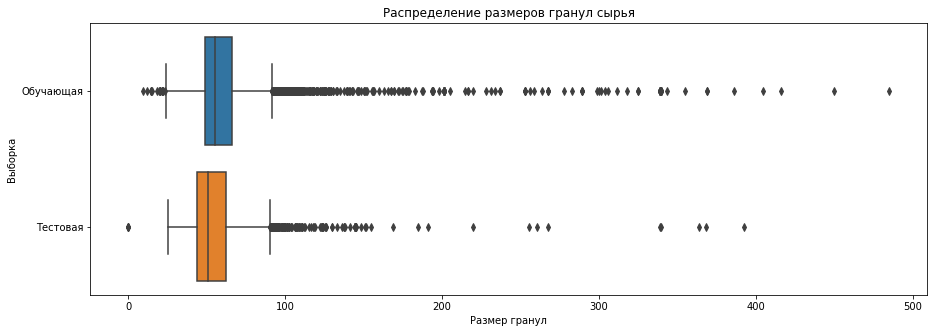

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=(data_train['rougher.input.feed_size'], 
                  data_test['rougher.input.feed_size']), orient='h').set(xlabel='Размер гранул', ylabel='Выборка', title='Распределение размеров гранул сырья')
plt.yticks([0,1], ['Обучающая', 'Тестовая']);

ВЫВОД: Мы видим, что размер гранул отличается незначительно, и значения можно использовать для обучения модели

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

<div class="alert alert-info">я изменила рассчет измененния суммарной концентрации и рассчеты провела на обучающем датасете вместо исходного (хотя в задании нет этого), так как по этим рассчетам мы будем очищать датасет от аномальных значений, а это нам необходимо сделать с обучающим датасетом</div> 

In [ ]:
rou = data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb']
#print("Черновая концентрация после флотации")
#print(f"Всех металлов:{round(rou,2)}")



In [ ]:
pri = data_train['primary_cleaner.output.concentrate_au'] + data_train['primary_cleaner.output.concentrate_ag'] + data_train['primary_cleaner.output.concentrate_pb']

#print("Концентрация после первичной очистки")
#print(f"Всех металлов:{round(pri,2)}")



In [ ]:
fin = data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb']

#print("Финальная концентрация")
#print(f"Всех металлов:{round(fin,2)}")



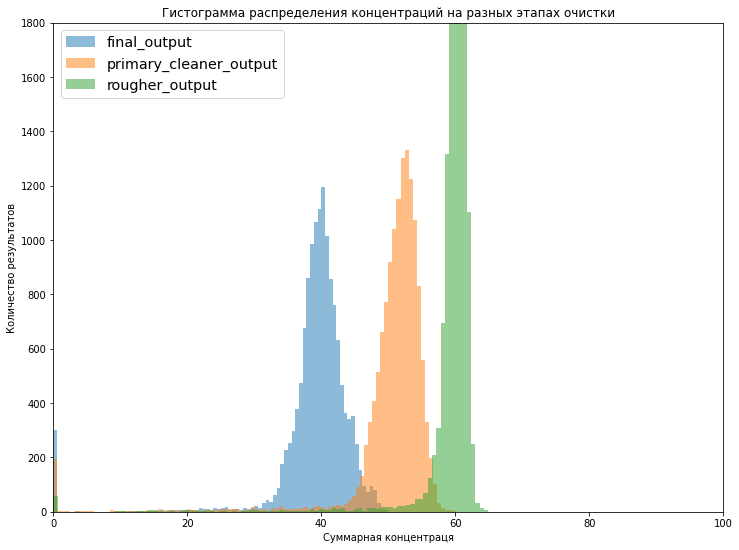

In [ ]:
plt.figure(figsize=[12,9])

plt.hist(rou, bins=100, label = 'final_output', alpha=0.5)
plt.hist(pri, bins=100, label = 'primary_cleaner_output', alpha=0.5)
plt.hist(fin, bins=100, label = 'rougher_output', alpha=0.5)

plt.xlim([0, 100])
plt.ylim([0, 1800])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

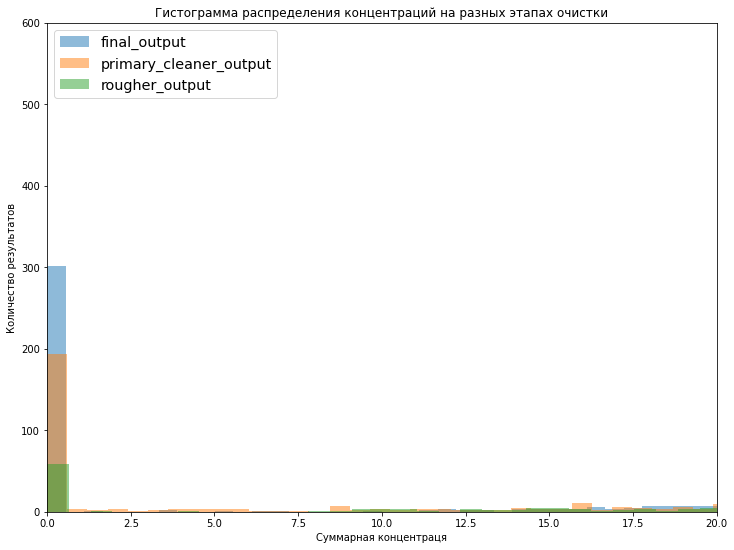

In [ ]:
#приблизим участок гистограммы с аномальными значениями
plt.figure(figsize=[12,9])

plt.hist(rou, bins=100, label = 'final_output', alpha=0.5)
plt.hist(pri, bins=100, label = 'primary_cleaner_output', alpha=0.5)
plt.hist(fin, bins=100, label = 'rougher_output', alpha=0.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

In [ ]:
data_train['rougher.output.concentrate_ag'].value_counts()

0.000000     297
7.458753      11
9.975555       6
0.010000       5
12.098115      4
            ... 
11.043310      1
10.489330      1
10.107551      1
9.666776       1
11.959486      1
Name: rougher.output.concentrate_ag, Length: 13829, dtype: int64

мы видим большое количество аномальных значений в районе 0, удалим их

In [ ]:
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_au"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_ag"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_pb"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_sol"] < 1].index, axis = 0)


data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_au"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_ag"] < 1].index,axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_pb"] < 1].index,axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_sol"] < 1].index,axis = 0)

data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_au"] < 1].index,axis = 0)
data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_ag"] < 1].index,axis = 0)
data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_pb"] < 1].index,axis = 0)
data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_sol"] < 1].index,axis = 0)

data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_au"] < 1].index,axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_ag"] < 1].index,axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_sol"] < 1].index,axis = 0)

In [ ]:
data_train.shape

(13304, 87)

In [ ]:
data_train['rougher.output.concentrate_ag'].value_counts()

12.098115    4
11.379910    3
11.500771    1
9.149926     1
9.153706     1
            ..
14.110038    1
13.274127    1
13.647229    1
13.829134    1
11.959486    1
Name: rougher.output.concentrate_ag, Length: 13299, dtype: int64

<div class="alert alert-info">проанализировала изменение сумм концентраций на разных этапах c помощб гистограмм - done, удалила аномальные значения - done</div> 

## Модель

Напишите функцию для вычисления итоговой sMAPE.

In [ ]:
def sMAPE(predict, target):
    sMAPE = (abs(target - predict) / ((abs(target) + abs(predict)) / 2)).mean() * 100
    return sMAPE

In [ ]:
def full_smape(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [ ]:
maker = make_scorer(sMAPE,greater_is_better=False)
#grid_cv = GridSearchCV(model, parameters_grid, scoring=maker, cv=cv)

Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [ ]:
STATE = 12345

Признаки обучающей выборки

In [ ]:
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
rougher_train_target = data_train['rougher.output.recovery']
final_train_target = data_train['final.output.recovery']

In [ ]:
print(f"Размер обучающей выборки features {features_train.shape[0]}")
print(f"Размер обучающей выборки rougher_target {rougher_train_target.shape[0]}")
print(f"Размер обучающей выборки final_target {final_train_target.shape[0]}")

Размер обучающей выборки features 13304
Размер обучающей выборки rougher_target 13304
Размер обучающей выборки final_target 13304


Масштабируем признаки

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)


Провереям с помощью кросс-валидации какая модель покажет лучший результат

In [ ]:
model_dtr = DecisionTreeRegressor(random_state=12345)
cross_val_score(model_dtr, features_train, rougher_train_target, cv=3, scoring=maker).mean()


-2.0931820464732835

In [ ]:
model_lr = LinearRegression()
cross_val_score(model_lr, features_train, rougher_train_target, cv=3, scoring=maker).mean()

-2.8238840666621265

In [ ]:
model_rf = RandomForestRegressor(random_state=STATE, n_estimators=10)
cross_val_score(model_rf, features_train, rougher_train_target, cv=3, scoring=maker).mean()

-1.670092541195156

ВЫВОД: Благодаря кросс валидации, мы определили, что лучшие значения показывает модель RandomForestRegressor

Оценка модели по таргету "final"

In [ ]:
model_dtr = DecisionTreeRegressor(random_state=12345)
cross_val_score(model_dtr, features_train, final_train_target, cv=3, scoring=maker).mean()


-3.2102497004963966

In [ ]:
model_lr = LinearRegression()
cross_val_score(model_lr, features_train, final_train_target, cv=3, scoring=maker).mean()

-4.352284828816116

In [ ]:
model_rf = RandomForestRegressor(random_state=STATE, n_estimators=10)
cross_val_score(model_rf, features_train, final_train_target, cv=3, scoring=maker).mean()

-2.428870515038984

Признаки исходной таблицы

In [ ]:
#features = data.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
#rougher_target = data['rougher.output.recovery']
#final_target = data['final.output.recovery']

<div class="alert alert-info">Столбец date в полной таблице "date" содержит уникальные значения. Мы будем использовать эти значения как индексы, чтобы объединить датасеты и добавить в тестовую выборку недостающие столбцы.</div> 

In [ ]:
data_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [ ]:
target_features_join = data[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()

In [ ]:
data_test = data_test.join(target_features_join.set_index('date'), on='date')

In [ ]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367


In [ ]:
data_test.isna().sum().sum()

0

In [ ]:
#сформируем новые features и target из обновленной таблицы data_test (вместо data)
features = data_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
rougher_target = data_test['rougher.output.recovery']
final_target = data_test['final.output.recovery']

у нас есть два типа целевых признаков - roughter и final они отвечают за разные этапы в очистке руды

In [ ]:
features_train_data, features_test_data, target_train_rou, target_test_rou = train_test_split(features, rougher_target, 
                                                                                  test_size=0.3, random_state=STATE)

In [ ]:
features_train_data, features_test_data, target_train_fin, target_test_fin = train_test_split(features, final_target, 
                                                                                  test_size=0.3, random_state=STATE)
 


In [ ]:
print(f"Размер тестовой выборки features {features_test_data.shape[0]}")
print(f"Размер тестовой выборки rougher_target {target_test_rou.shape[0]}")
print(f"Размер тестовой выборки final_target {target_test_fin.shape[0]}")


Размер тестовой выборки features 1587
Размер тестовой выборки rougher_target 1587
Размер тестовой выборки final_target 1587


Масштабируем признаки

In [ ]:
scaler = StandardScaler()
scaler.fit(features_test_data)
features_train = scaler.transform(features_test_data)

проверим тодель RandomForestRegressor с помощью полученной тестовой выборки

In [ ]:
model_rou = RandomForestRegressor(random_state=STATE, max_depth=2)
model_fin = RandomForestRegressor(random_state=STATE, max_depth=2)

model_rou = model_rou.fit(features_train_data, target_train_rou)
model_fin = model_fin.fit(features_train_data, target_train_fin)

predictions_rou = model_rou.predict(features_test_data)
predictions_fin = model_fin.predict(features_test_data)

In [ ]:
#sMAPE(predict, target)

In [ ]:
#применим написанные ранее функции для подсчета sMAPE
sMAPE_rougher = sMAPE(target_test_rou, predictions_rou)

In [ ]:
sMAPE_final = sMAPE(target_test_fin, predictions_fin)

In [ ]:
full_smape = full_smape(sMAPE_rougher,sMAPE_final)
full_smape

8.862135275969681

In [ ]:
dummy_model = DummyClassifier(strategy='uniform', random_state=STATE)

In [ ]:
dummy_model = RandomForestRegressor(random_state=STATE, max_depth=2)
dummy_model = RandomForestRegressor(random_state=STATE, max_depth=2)

dummy_model_rou = dummy_model.fit(features_train_data, target_train_rou)
dummy_model_fin = dummy_model.fit(features_train_data, target_train_fin)

predictions_rou_d = dummy_model_rou.predict(features_test_data)
predictions_fin_d = dummy_model_fin.predict(features_test_data)

In [ ]:
#применим написанные ранее функции для подсчета sMAPE
sMAPE_rougher_d = sMAPE(target_test_rou, predictions_rou_d)

In [ ]:
sMAPE_final_d = sMAPE(target_test_fin, predictions_fin_d)

In [ ]:
full_smape_d = 0.25*sMAPE_rougher_d + 0.75*sMAPE_final_d
full_smape_d


13.5207524638369

ВЫВОД: Метрика качества sMAPE показывает низкие значения, значит ошибки маловероятны (ниже, чем константная модель)